In [71]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage import color
from skimage.transform import resize

### Read the images

In [72]:
imagedir = r"C:\Users\kalya\Downloads\plant-seedlings-classification\train"
#TESTDATADIR = r"C:\Users\kalya\Downloads\plant-seedlings-classification\test"
cat=["Black-grass","Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed","Shepherds Purse","Small-flowered Cranesbill","Sugar beet"]

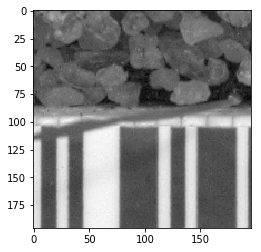

In [73]:
for category in cat:
    path = os.path.join(imagedir,category)
    for img in os.listdir(path):
        img_array = io.imread(os.path.join(path,img),as_gray=True)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

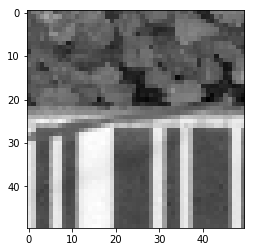

In [74]:
img_size=50
new_array = resize(img_array, (img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [75]:
training_data = []
img_size=50

def create_training_data():
    for category in cat:
        path = os.path.join(imagedir,category)
        class_num = cat.index(category)
        for img in os.listdir(path):
            img_array = io.imread(os.path.join(path,img),as_gray=True)      
            new_array = resize(img_array, (img_size,img_size))
            training_data.append([new_array,class_num])    

In [56]:
create_training_data()

In [57]:
print(len(training_data))

4750


In [61]:
training_data[198]

[array([[0.5738159 , 0.57597347, 0.58955419, ..., 0.5457199 , 0.54116347,
         0.53894312],
        [0.58693776, 0.58905164, 0.57937192, ..., 0.60214205, 0.60266984,
         0.59650011],
        [0.56317158, 0.5564617 , 0.54812696, ..., 0.55772356, 0.5557984 ,
         0.57670647],
        ...,
        [0.30745486, 0.15041551, 0.34198812, ..., 0.29477694, 0.28615576,
         0.37796977],
        [0.45239419, 0.1875965 , 0.28341831, ..., 0.31395587, 0.31320813,
         0.26143855],
        [0.21317817, 0.20075375, 0.24521329, ..., 0.15843832, 0.36542252,
         0.36367212]]), 0]

In [62]:
X=[]
Y=[]

In [63]:
for feature, label in training_data:
    X.append(feature)
    Y.append(label)

X = np.array(X).reshape(-1,img_size,img_size,1)

In [64]:
X.shape

(4750, 50, 50, 1)

In [65]:
Y = np.array(Y)

In [66]:
Y.shape

(4750,)

### Split into Test and Train

In [14]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

Using TensorFlow backend.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### Build initial model

In [18]:
#One-hot encoding the labels
y_train = np_utils.to_categorical(y_train, 12)
y_test = np_utils.to_categorical(y_test, 12)

In [69]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(3182, 12)
(1568, 12)
(3182, 50, 50, 1)
(1568, 50, 50, 1)


In [23]:
#Reshape the data
X_train = X_train.reshape(X_train.shape[0], 50, 50, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 50, 50, 1).astype('float32')

In [70]:
#Normalize both the train and test image data from 0-255 to 0-1
X_train=X_train / 255
X_test=X_test / 255

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D,BatchNormalization
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D

In [26]:
#Initialize Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(BatchNormalization())
# 1st Dense Layers
model.add(Dense(500))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
#output layer
model.add(Dense(12))
model.add(Activation('softmax'))
# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=10, 
              validation_data=(X_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 3182 samples, validate on 1568 samples
Epoch 1/10
3182/3182 [==============================] - 39s 12ms/step - loss: 2.2980 - acc: 0.2021 - val_loss: 14.8126 - val_acc: 0.0810
Epoch 2/10
3182/3182 [==============================] - 37s 11ms/step - loss: 2.0404 - acc: 0.3086 - val_loss: 15.1621 - val_acc: 0.0593
Epoch 3/10
3182/3182 [==============================] - 37s 12ms/step - loss: 1.7026 - acc: 0.4189 - val_loss: 14.0719 - val_acc: 0.0944
Epoch 4/10
3182/3182 [==============================] - 38s 12ms/step - loss: 1.2009 - acc: 0.5921 - val_loss: 15.1313 - val_acc: 0.0612
Epoch 5/10
3182/3182 [==============================] - 37s 12ms/step - loss: 0.8059 - acc: 0.7379 - val_loss: 14.4528 - val_acc: 0.1033
Epoch 6/10
3182/3182 [==============================] - 38s 12ms/step - loss: 0.5866 - acc: 0.8067 - val_loss: 14.5042 - val_acc: 0.1001
Epoch 7/10

#### Accuracy is too low, let's now tune it

Optimized by tuning the following hyper parameters
1. Filter Size
2. Number of Filters
3. Strides
4. Kernel Regularization

Also we can add dropout layer to generalize the dense layer.

In [27]:
#Building up a Sequential model
from keras.layers import GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D,MaxPooling2D

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu',input_shape = X_train.shape[1:]))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(GlobalAveragePooling2D())
model1.add(Dense(1000, activation='relu')) 
# Dropout
model1.add(Dropout(0.25))
model1.add(Dense(800, activation='relu')) 
model1.add(Dense(12, activation='softmax'))
model1.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
___________________________

In [28]:
model1.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [29]:
batch_size=32
epochs = 10
model1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 3182 samples, validate on 1568 samples
Epoch 1/10
3182/3182 [==============================] - 8s 2ms/step - loss: 0.2820 - acc: 0.9167 - val_loss: 0.2811 - val_acc: 0.9167
Epoch 2/10
3182/3182 [==============================] - 6s 2ms/step - loss: 0.2810 - acc: 0.9167 - val_loss: 0.2809 - val_acc: 0.9167
Epoch 3/10
3182/3182 [==============================] - 7s 2ms/step - loss: 0.2810 - acc: 0.9167 - val_loss: 0.2805 - val_acc: 0.9167
Epoch 4/10
3182/3182 [==============================] - 7s 2ms/step - loss: 0.2810 - acc: 0.9167 - val_loss: 0.2805 - val_acc: 0.9167
Epoch 5/10
3182/3182 [==============================] - 7s 2ms/step - loss: 0.2810 - acc: 0.9167 - val_loss: 0.2806 - val_acc: 0.9167
Epoch 6/10
3182/3182 [==============================] - 7s 2ms/step - loss: 0.2809 - acc: 0.9167 - val_loss: 0.2808 - val_acc: 0.9167TA: 0s - loss: 0.2808 - acc: 0. - ETA: 0s - loss: 0.2809 - acc: 0
Epoch 7/10
3182/3182 [==============================] - 7s 2ms/step - loss: 0.2810 

### Predict the accuracy for both train and test data

In [30]:
#Evaluate the model on the train data
score = model1.evaluate(X_train, y_train)

#Accuracy on test data
print('Accuracy on the Train Images: ', score[1])

3182/3182 [==============================] - 1s 415us/step
Accuracy on the Train Images:  0.9166666269302368


In [31]:
#Evaluate the model on the test data
score = model1.evaluate(X_test, y_test)

#Accuracy on test data
print('Accuracy on the Test Images: ', score[1])

1568/1568 [==============================] - 1s 435us/step
Accuracy on the Test Images:  0.9166666269302368


Accuracy is close to 92% for both Training and Test data